# Graduates Admission - Fairness

In this notebook, we will work on fairness issue with the dataset using [AIF360](https://github.com/Trusted-AI/AIF360).


## Load data

In [2]:
import pandas as pd

data = pd.read_csv('./data/admission_data-v2.csv')
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Gender,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,M,0.92
1,324,107,4,4.0,4.5,8.87,1,F,0.76
2,316,104,3,3.0,3.5,8.00,1,M,0.72
3,322,110,3,3.5,2.5,8.67,1,M,0.80
4,314,103,2,2.0,3.0,8.21,0,F,0.65


## Bias in Data

### Basic plots

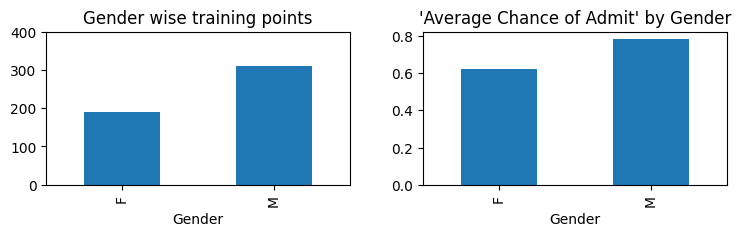

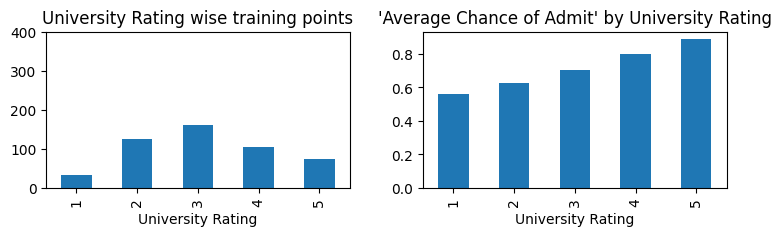

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns


def plot_basic_bias(feature):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

    pd.DataFrame(data[feature].value_counts()).sort_index().plot(
        ax=ax1, kind='bar', legend=None)
    ax1.set_xlabel(feature)
    ax1.set_ylim(0, 400)
    ax1.set_title(f'{feature} wise training points')

    pd.DataFrame(data.groupby(by=[feature]).agg(
        {'Chance of Admit': 'mean'}).sort_values(by=feature)).plot(kind='bar', ax=ax2, legend=None)
    ax2.set_title(f"'Average Chance of Admit' by {feature}")

    fig.tight_layout(pad=3)
    plt.show()

plot_basic_bias('Gender')
plot_basic_bias('University Rating')

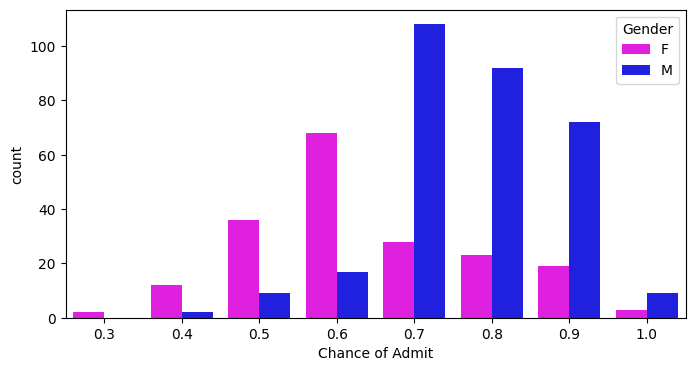

In [4]:
feature = 'Gender'
data_for_plot = data[[feature, 'Chance of Admit']].sort_values(by=feature)
data_for_plot['Chance of Admit'] = data_for_plot['Chance of Admit'].apply(lambda x: round(x, 1))
plt.figure(figsize=(8, 4))
sns.countplot(x='Chance of Admit', data=data_for_plot, hue=feature, palette=['magenta', 'blue'])
plt.show()

### Fairness metrics

In [6]:
from aif360.sklearn.metrics import statistical_parity_difference, disparate_impact_ratio
import warnings
warnings.filterwarnings('ignore')

feature = 'Gender'
privileged_values = ['M']
df_for_fairness_check = data.copy()
threshold = 0.8
df_for_fairness_check['Chance of Admit'] = df_for_fairness_check['Chance of Admit'].apply(lambda x: x > threshold)
for val in privileged_values:
    df_for_fairness_check.loc[df_for_fairness_check[feature] == val, feature] = 1
df_for_fairness_check.loc[df_for_fairness_check[feature] != 1, feature] = 0
df_for_fairness_check.set_index([feature], inplace=True)
print(f'Statistical parity difference for {feature} = ',
      statistical_parity_difference(df_for_fairness_check['Chance of Admit']))
print(f'Disparate impact ratio for {feature} = ',
      disparate_impact_ratio(df_for_fairness_check['Chance of Admit']))


Statistical parity difference for Gender =  -0.27316626848980835
Disparate impact ratio for Gender =  0.29659685863874347
